In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2024-01-04 19:59:20.532011: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-04 19:59:20.573123: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-04 19:59:20.574024: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-04 19:59:21.471066: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
# Scale the values by dividing 255 , because max value is 255
X_train = X_train / 255
X_test = X_test / 255
X_test[0]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [5]:
X_train_flatten = X_train.reshape(len(X_train),28*28)
X_test_flatten = X_test.reshape(len(X_test),28*28)


In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flatten, y_train, epochs=5)

model.save()

Epoch 1/5


2024-01-04 19:59:26.173598: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 3s 1ms/step - loss: 0.4692 - accuracy: 0.8769
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3032 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2828 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2732 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2664 - accuracy: 0.9254


In [8]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2670 - accuracy: 0.9262


[0.26700785756111145, 0.9261999726295471]

In [9]:
y_predicted = model.predict(X_test_flatten)

313/313 [==============================] - 0s 1ms/step


array([3.8273495e-01, 2.8765353e-03, 9.9928051e-01, 4.0591469e-01,
       7.9841023e-10, 8.4976625e-01, 8.7939620e-01, 8.1958290e-13,
       1.7327170e-01, 1.4807303e-09], dtype=float32)

9

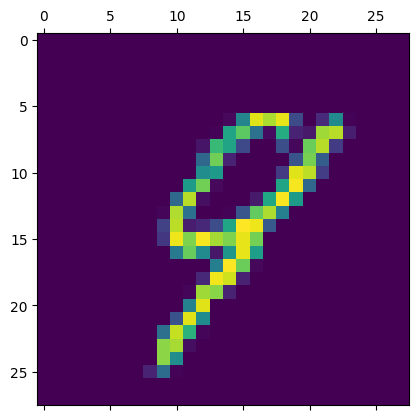

In [18]:
testing_number_index = 92

plt.matshow(X_test[testing_number_index])
np.argmax(y_predicted[testing_number_index])